# 8.字符串转换整数

## 8.1题目描述

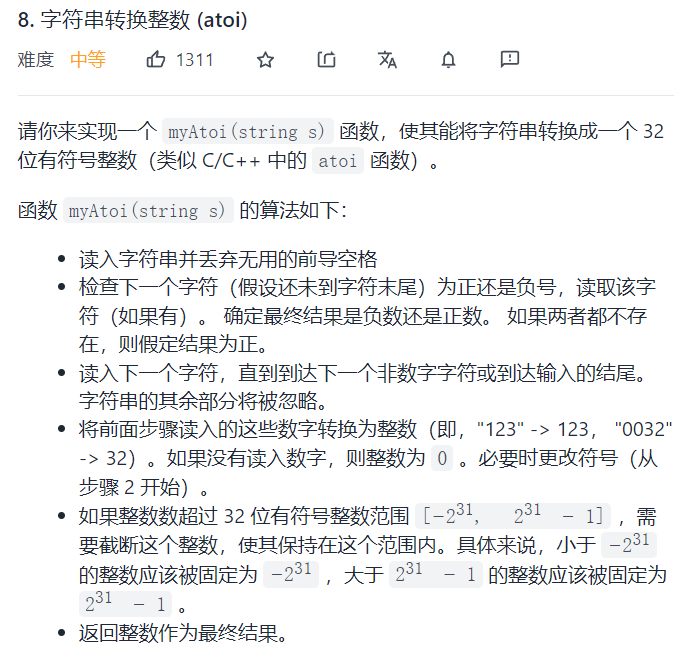

## 8.2我的代码

哎，这道题目太奇怪了，写起来不难但是调试起来太复杂了。

"00000-42a1234"想不明白这个为什么输出不是-42。

想不明白题目里面的读入数字是什么意思。

In [52]:
class Solution:
    def myAtoi(self, s: str) -> int:
        s_list = list(s)
        i = 0   # 倒序索引 
        flag = 1    # 控制正负
        count = 0   # 记录数字长度
        temp = []   
        temp_out = 0     # 输出
        num_list = ['0','1','2','3','4','5','6','7','8','9']
        while i<len(s_list):
            if s_list[i] == ' ':
                i = i+1
                continue
            elif s_list[i] == '-':
                flag = -1
                temp.append(s_list[i])
            elif s_list[i] == '+':
                flag = 1
                temp.append(s_list[i])
            elif s_list[i] in num_list:
                temp.append(s_list[i])
                count = count+1
            else:
                break
            i = i+1
        if (len(temp)>=2) and (temp[0] not in num_list) and (temp[1] not in num_list):
            temp = ['0']
        for i in range(len(temp)):
            if temp[i] in num_list:
                temp_out = int(temp[i])*10**(len(temp)-i-1)+temp_out
        if flag == -1:
            temp_out = -temp_out
        if temp_out<-2**31:
            temp_out = -2**31
        if temp_out>2**31-1:
            temp_out = 2**31-1

        return temp_out


# 8.3官方代码

In [ ]:
INT_MAX = 2 ** 31 - 1
INT_MIN = -2 ** 31

class Automaton:
    def __init__(self):
        self.state = 'start'
        self.sign = 1
        self.ans = 0
        self.table = {
            'start': ['start', 'signed', 'in_number', 'end'],
            'signed': ['end', 'end', 'in_number', 'end'],
            'in_number': ['end', 'end', 'in_number', 'end'],
            'end': ['end', 'end', 'end', 'end'],
        }
        
    def get_col(self, c):
        if c.isspace():
            return 0
        if c == '+' or c == '-':
            return 1
        if c.isdigit():
            return 2
        return 3

    def get(self, c):
        self.state = self.table[self.state][self.get_col(c)]
        if self.state == 'in_number':
            self.ans = self.ans * 10 + int(c)
            self.ans = min(self.ans, INT_MAX) if self.sign == 1 else min(self.ans, -INT_MIN)
        elif self.state == 'signed':
            self.sign = 1 if c == '+' else -1

class Solution:
    def myAtoi(self, str: str) -> int:
        automaton = Automaton()
        for c in str:
            automaton.get(c)
        return automaton.sign * automaton.ans

# 作者：LeetCode-Solution
# 链接：https://leetcode-cn.com/problems/string-to-integer-atoi/solution/zi-fu-chuan-zhuan-huan-zheng-shu-atoi-by-leetcode-/
# 来源：力扣（LeetCode）
# 著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

## 8.4回顾

1.要学会用  .isspace()   .isdigit()

2.居然还可以在外面加一个类，学到了

3.这道题目做的可以说是相当失败了